## Exercise 7: Regression for Prediction and Causal Inference

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from typing import List, Optional, Tuple, Dict, Callable
import matplotlib as mlp
import matplotlib.pyplot as plt

### Task 1: Ridge Regression


In lecture we have learned that in *ridge regression*, we want to minimize the loss function 
$$
L(\beta) = \sum_{i=1}^n \left(y_i-\beta_0-\sum_{j=1}^p\beta_j x_{ij}\right)^2 + \lambda \sum_{j=1}^p \beta_j^2.
$$

#### a) Implementing the Loss

Implement a function that computes the value of the loss function, using the signature in the cell below. Assume that the first column of your input matrix $X$ has all-constant values $1$ to model the intercept. 

In [2]:
def loss(X: np.ndarray, y: np.ndarray, beta: np.ndarray, reg: float) -> float:
    """
    :param X: 2-dimensional numpy array of features 
    :param y: 1-dimensional array of target values
    :param beta: current parameter vector
    :param reg: float, regularization term (lambda)
    :
    :return: AUC score as float
    """
    # your code here
    #raise NotImplementedError
    right_sum = reg * np.sum(np.square(beta))
    left_sum = np.sum(np.square(y - np.dot(X,beta)))
    return left_sum + right_sum 

#### b) Convexity of the Loss

We explore the cost function with a practical example. Load the Iris dataset, and set up a univariate regression in which you predict petal width from petal length.
Set  $\beta_0 = mean(y)$ and $\lambda = 1$, and plot the value of the cost function against $\beta_1$ for  $\beta_1 \in\{-10,-9.9,\dots,9.9,10\}$.  
Is there a unique minimum? What is the sign of the derivative at $\beta = -3$ and $\beta = 3$? In which direction does it point - in direction of the minimum or against it?

In [3]:
from sklearn import datasets

# import the iris dataset - it is actually incorporated in the library
iris = datasets.load_iris()

# recall the details on the dataset
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
y = iris.data[:,3]
X = iris.data[:,2]
beta_0 = np.mean(y)
X = np.transpose(np.vstack((np.ones(len(X)), X)))
lambda_score = 1
X

array([[1. , 1.4],
       [1. , 1.4],
       [1. , 1.3],
       [1. , 1.5],
       [1. , 1.4],
       [1. , 1.7],
       [1. , 1.4],
       [1. , 1.5],
       [1. , 1.4],
       [1. , 1.5],
       [1. , 1.5],
       [1. , 1.6],
       [1. , 1.4],
       [1. , 1.1],
       [1. , 1.2],
       [1. , 1.5],
       [1. , 1.3],
       [1. , 1.4],
       [1. , 1.7],
       [1. , 1.5],
       [1. , 1.7],
       [1. , 1.5],
       [1. , 1. ],
       [1. , 1.7],
       [1. , 1.9],
       [1. , 1.6],
       [1. , 1.6],
       [1. , 1.5],
       [1. , 1.4],
       [1. , 1.6],
       [1. , 1.6],
       [1. , 1.5],
       [1. , 1.5],
       [1. , 1.4],
       [1. , 1.5],
       [1. , 1.2],
       [1. , 1.3],
       [1. , 1.4],
       [1. , 1.3],
       [1. , 1.5],
       [1. , 1.3],
       [1. , 1.3],
       [1. , 1.3],
       [1. , 1.6],
       [1. , 1.9],
       [1. , 1.4],
       [1. , 1.6],
       [1. , 1.4],
       [1. , 1.5],
       [1. , 1.4],
       [1. , 4.7],
       [1. , 4.5],
       [1. ,

In [5]:
beta_1 = [x for x in np.arange(-10, 10, 0.1)]
beta_1


[-10.0,
 -9.9,
 -9.8,
 -9.700000000000001,
 -9.600000000000001,
 -9.500000000000002,
 -9.400000000000002,
 -9.300000000000002,
 -9.200000000000003,
 -9.100000000000003,
 -9.000000000000004,
 -8.900000000000004,
 -8.800000000000004,
 -8.700000000000005,
 -8.600000000000005,
 -8.500000000000005,
 -8.400000000000006,
 -8.300000000000006,
 -8.200000000000006,
 -8.100000000000007,
 -8.000000000000007,
 -7.9000000000000075,
 -7.800000000000008,
 -7.700000000000008,
 -7.6000000000000085,
 -7.500000000000009,
 -7.400000000000009,
 -7.30000000000001,
 -7.20000000000001,
 -7.10000000000001,
 -7.000000000000011,
 -6.900000000000011,
 -6.800000000000011,
 -6.700000000000012,
 -6.600000000000012,
 -6.500000000000012,
 -6.400000000000013,
 -6.300000000000013,
 -6.2000000000000135,
 -6.100000000000014,
 -6.000000000000014,
 -5.900000000000015,
 -5.800000000000015,
 -5.700000000000015,
 -5.600000000000016,
 -5.500000000000016,
 -5.400000000000016,
 -5.300000000000017,
 -5.200000000000017,
 -5.10000000

In [6]:
for beta_1_ in beta_1:
    beta = np.array([beta_0, beta_1_])
    y_pred = np.dot(X,beta)
    #print(y - y_pred)

In [7]:
loss_value = []
for beta_1_ in beta_1:
    beta = np.array([beta_0, beta_1_])
    loss_beta_1_ = loss(X, y, beta, lambda_score)
    loss_value.append(loss_beta_1_)

In [8]:
loss_value

[262319.9243337778,
 257139.73227377774,
 252011.2144137778,
 246934.37075377777,
 241909.20129377785,
 236935.70603377785,
 232013.88497377787,
 227143.7381137779,
 222325.26545377792,
 217558.46699377795,
 212843.34273377794,
 208179.89267377797,
 203568.11681377795,
 199008.01515377796,
 194499.58769377798,
 190042.834433778,
 185637.75537377805,
 181284.35051377802,
 176982.6198537781,
 172732.56339377805,
 168534.18113377807,
 164387.47307377806,
 160292.4392137781,
 156249.07955377805,
 152257.3940937781,
 148317.38283377813,
 144429.0457737781,
 140592.3829137781,
 136807.39425377815,
 133074.07979377813,
 129392.43953377816,
 125762.47347377817,
 122184.18161377819,
 118657.56395377818,
 115182.62049377819,
 111759.35123377819,
 108387.75617377821,
 105067.83531377821,
 101799.58865377824,
 98583.0161937782,
 95418.11793377822,
 92304.89387377823,
 89243.34401377822,
 86233.46835377825,
 83275.26689377823,
 80368.73963377823,
 77513.88657377825,
 74710.70771377823,
 71959.20305

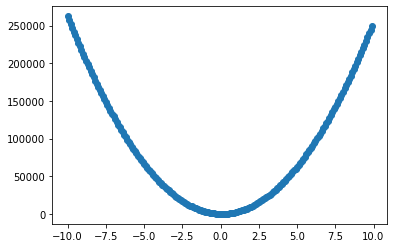

In [9]:
plt.scatter(beta_1, loss_value)

#### c) Gradient Descent

In practice, regularized regression models regression are usually optimized by a variant of gradient descent. As discussed in lecture, in this iterative procedure one first initializes $\beta$ at random, and then, until convergence, one updates
$$\beta^{new} \gets \beta^{old} - \alpha\cdot \nabla L(\beta^{old}), $$
where $\alpha$ is the so-called learning rate, and $\nabla L(\beta)$ the gradient of the loss function with respect to $\beta$.
As discussed in lecture, the gradient of the loss function is given by 
$$
\frac{\partial C(\beta)}{\partial \beta_k} = \sum_{i=1}^n -2x_{ik} \left(y_i-\beta_0-\sum_{j=1}^p\beta_j x_{ij}\right) + 2\alpha\beta_k,
$$
where for $\beta_0$, we would have $x_{ik}=1$.

In [33]:
X = iris.data
len(X[0])


4

In [34]:
a = np.ones(5)


Implement a function that optimizes a ridge regression model via gradient descent, using the function signature in the cell below. Initialize your model in a way that $\beta_0$ equals the mean of $y$ and all other elements of $\beta$ are drawn from the standard normal distribution.

In [49]:
def ridge_GD(X: np.ndarray, y: np.ndarray, reg: float, alpha: float, eps: float, max_iter: int=10000) -> Tuple[np.ndarray,int,np.ndarray]:
    """
    :param X: 2-dimensional numpy array of features 
    :param y: 1-dimensional array of target values
    :param reg: regularization term (lambda)
    :param alpha: learning rate
    :param eps: convergence treshold
    :param max_iter: maximum number of iterations in gradient descent
    : -> break iteration when that number is reached even is we have not yet converged
    :
    :return: Tuple of three variables:
    :        1. 1D numpy array containing optimal coefficients beta
    :        2. number of iterations n_it
    :        3. vector of loss function values in every iteration
    :
    """
    # your code here
    #raise NotImplementedError
    
    beta = np.random.normal(size=len(X[0]))
    n_it = 0
    loss_vector = []
    
    for i in range(max_iter):
        n_it = n_it + 1
        
        left_part_of_gradient =  (-2 * np.dot((y - np.dot(X,beta)), X))
        right_part_of_gradient = 2 * alpha * beta
        gradient_of_beta_old = left_part_of_gradient + right_part_of_gradient
        
        beta_new = beta - alpha * gradient_of_beta_old
        loss_value = loss(X,y,beta,reg)
        if len(loss_vector) > 1 :
            if np.linalg.norm(loss_value - loss_vector[-1]) <= eps:
                break
        beta = beta_new
        loss_vector.append(loss_value)
    tup = (beta, n_it, loss_vector)
    return tup

#### d) Regressing on Iris Data
Rescale the numerical columns of the Iris data by the z-score and apply your implementation from c) to predict the petal width from all other columns, using $\lambda = 1$, $\alpha=0.001$, $\epsilon=10^{-6}$. Compare the resulting parameters with those resulting from the ```statsmodels``` implementation of regularized regression fits!

In [50]:
y = iris.data[:,3]
X = iris.data[:,:3]


In [51]:
X = np.vstack((np.ones(len(y)), np.transpose(X)))
X = np.transpose(X)

In [52]:
print(ridge_GD(X, y, 1, 0.0001, 0.000001, 10000))

(array([-0.40230484, -0.18066839,  0.23463773,  0.51590438]), 10000, [5206.612189695787, 3503.806489406981, 2362.383547974304, 1596.2275054986044, 1082.7822840568324, 737.9924494325646, 507.0050551808954, 351.7842737781108, 247.84064416362804, 177.91322630209942, 131.10983968599785, 99.56439367757109, 78.4602633484299, 64.19082472431926, 54.645025627834876, 48.15469693048783, 43.80748321734612, 40.82224273264158, 38.813534165187065, 37.409331827431416, 36.45297685698598, 35.763258932315715, 35.28091103617507, 34.91511018081044, 34.64669921271462, 34.42857031237347, 34.25712978340961, 34.10698596871492, 33.979885082223305, 33.861581659894334, 33.75511129682849, 33.6521675442612, 33.55562079108013, 33.46045752682346, 33.368974846163596, 33.27805798846525, 33.1894121544841, 33.10105727889706, 33.014208811023565, 32.92758574602529, 32.84203373987619, 32.75671312990495, 32.67220329438673, 32.58794848984978, 32.504341550954784, 32.421011951880644, 32.338224044382535, 32.255729370561994, 32.1

In [53]:
from scipy.stats import zscore

X = iris.data[:,:-2]

X = pd.DataFrame(X).apply(zscore)
X = np.vstack((np.ones(len(y)), np.transpose(X)))
X = np.transpose(X)
#X = X.to_numpy()


In [54]:
beta,n_it,losses = ridge_GD(X,y,reg=1,alpha=1e-03,eps=1e-06)
print(beta,n_it,losses)
print(beta)
print(n_it)

[ 1.19932465  0.59692969 -0.20796109] 43 [840.1089714411604, 418.93329725521215, 215.04181881044138, 116.32465634139024, 68.54384795334803, 45.43799702081894, 34.28387023953425, 28.91507624684559, 26.342963171435112, 25.11962755722869, 24.544319403614363, 24.27852174785479, 24.15920419966878, 24.108228692164367, 24.088423154399848, 24.082306831136854, 24.08180664965281, 24.08330218445559, 24.08524997221226, 24.087053168649028, 24.088530038414813, 24.089668605009166, 24.090516740844066, 24.091135415316277, 24.09158070624209, 24.0918984042382, 24.092123749668612, 24.092282964019393, 24.09239515913481, 24.092474082126245, 24.092529535923784, 24.09256847064619, 24.092595794748906, 24.09261496576222, 24.092628414942496, 24.09263784993067, 24.092644469235683, 24.092649113649575, 24.092652372863693, 24.092654660411217, 24.09265626628547, 24.092657393856946]
[ 1.19932465  0.59692969 -0.20796109]
43


In [55]:
#solution with statsmodels

# need to add constant term
X = sm.add_constant(X)

# initialize model: OLS = ordinary least squares
model = sm.OLS(y,X)
# fit model: only now the model, i.e. the parameters are computed
results = model.fit_regularized(alpha=1e-03, L1_wt=0)
results.params

array([ 1.1981352 ,  0.59635388, -0.20782215])

#### e) The Effect of the Learning Rate

Reoptimize your model using different learning rates $\alpha \in \{10^{-i} : i\in\{1,2,3,4,5,6\}\}$.
What are the effects on your optimization?

In [56]:
list_of_ten_exp = [1e-02,1e-03,1e-04,1e-05,1e-06,1e-07]



In [57]:
for alpha in list_of_ten_exp:
    beta,n_it,losses = ridge_GD(X,y,reg=1,alpha=alpha,eps=1e-06)
    print(beta,n_it,losses[-1])

C:\Users\vahee\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\vahee\AppData\Local\Temp/ipykernel_8196/3804445091.py:34: RuntimeWarning: invalid value encountered in double_scalars
  if np.linalg.norm(loss_value - loss_vector[-1]) <= eps:
C:\Users\vahee\AppData\Local\Temp/ipykernel_8196/752938101.py:13: RuntimeWarning: overflow encountered in square
  left_sum = np.sum(np.square(y - np.dot(X,beta)))
C:\Users\vahee\AppData\Local\Temp/ipykernel_8196/752938101.py:12: RuntimeWarning: overflow encountered in square
  right_sum = reg * np.sum(np.square(beta))
C:\Users\vahee\AppData\Local\Temp/ipykernel_8196/3804445091.py:27: RuntimeWarning: overflow encountered in multiply
  left_part_of_gradient =  (-2 * np.dot((y - np.dot(X,beta)), X))


[nan nan nan] 10000 nan
[ 1.19932479  0.59692858 -0.20796214] 43 24.092656691460654
[ 1.19931966  0.59693195 -0.20796299] 391 24.092648752084433
[ 1.19196761  0.5935053  -0.21054187] 1888 24.082657627306606
[ 1.15611609  0.64856931 -0.22389082] 10000 24.809706308896683
[0.26620989 1.64707482 1.00960615] 10000 499.38391288977283


### Task 2: Causal Inference

In this task we use a dataset (NSW.csv) which aimed to evaluate the effect of participating in a job training program on the salary. This data was taken from the website of Gelman and Hill's book (http://www.stat.columbia.edu/~gelman/arm/), and originally constructed in two independent studies (see Gelman and Hill, chapter 10, ex. 1).
This data contains some demographic data of its population, the real earnings in 1974 and 1975, and indicator on whether job training, i.e., the treatment, was conducted in 1976/77, and the earnings in 1978, which is our target variable. A brief documentation can be found in "NSW.doc". Make sure that when loading the data, you omit the sample variable which simply indicates a source that a specific observation originated from. 
Note that there are only very few treated individuals in the dataset.

In [21]:
df = pd.read_csv("NSW.csv", index_col=0)
df.head()

,age,educ,black,married,nodegree,re74,re75,re78,hisp,sample,treat,educ_cat4
1,42,16,0,1,0,0.000000,0.000000,100.485405,0,2,0,4
2,20,13,0,0,0,2366.794189,3317.467773,4793.745117,0,2,0,3
3,37,12,0,1,0,25862.322266,22781.855469,25564.669922,0,2,0,2
4,48,12,0,1,0,21591.121094,20839.355469,20550.744141,0,2,0,2
5,51,12,0,1,0,21395.193359,21575.177734,22783.587891,0,2,0,2


#### a) Implementing Stratification

Write a function that applies stratification for causal inference and computes the corresponding average treatment effect. 
Make sure to introduce strata of (nearly) equal size, and apply a logistic regression classifier to model the propensity scores. Use the function signature specified in the cell below. 

In [22]:
def stratify(X: np.ndarray, y: np.ndarray, T: np.ndarray, n: int) -> float:
    """
    :param X: 2-dimensional numpy array of covariates, excluding treatment and target variable 
    :param T: 1-dimensional array of binary treatment values, corresponding to instances of X
    :param y: 1-dimensional array of target values
    :param n: number of strata to split the data into
    :
    :return: average treatment effect as float
    """
    # your code here
    raise NotImplementedError

#### b) Applying Stratification

Apply your implementation from a) on the NSW data, using $n=5$ strata. Feel free to apply varying numbers of strata. Does a big number like $n>100$ make sense for this dataset?

#### c) Implementing Propensity Score Weighting

Write a function that applies propensity score weighting for causal inference and computes the corresponding average treatment effect. Again, apply a logistic regression classifier to model the propensity scores. Use the function signature specified in the cell below. 

In [23]:
def propensity_weighting(X: np.ndarray, y: np.ndarray, T: np.ndarray) -> float:
    """
    :param X: 2-dimensional numpy array of covariates, excluding treatment and target variable 
    :param T: 1-dimensional array of binary treatment values, corresponding to instances of X
    :param y: 1-dimensional array of target values
    :
    :return: average treatment effect as float
    """
    # your code here
    raise NotImplementedError

#### d) Applying Propensity Score Weighting

Apply your implementation from c) on the NSW data, and compare the result to the ATE from b) as well as the unweighted and unstratified ATE. What do you observe?

#### e) Propensity Score Matching

Finally, we want to apply propensity score matching on the NSW data. 
Write a function that applies propensity score matching, and returns the resulting ATE.
Note that due to the strong imbalance between the cardinalities of the control group and the treatment group, you do not need to consider a calliper in this task.

In [ ]:
def propensity_matching(X: np.ndarray, y: np.ndarray, T: np.ndarray) -> float:
    """
    :param X: 2-dimensional numpy array of covariates, excluding treatment and target variable 
    :param T: 1-dimensional array of binary treatment values, corresponding to instances of X
    :param y: 1-dimensional array of target values
    :
    :return: average treatment effect as float
    """
    # your code here
    raise NotImplementedError

#### f) Applying Propensity Score Matching

Apply your implementation from e) on the NSW data and use the matching to compute the ATE score on matched data, and compare the result to the ATEs from b) and d) as well as the unweighted and unstratified ATE. What do you observe?